In [1]:
import preprocessing as pp
import detection
import measurement

import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math


### GLOBAL FLAGS ###
DO_MEAS = False

# 0. Helper functions

In [2]:
def draw_lines_circles(img, lines, circles, thickness=2):

    base_n_shapes = cv2.cvtColor(img.copy(), cv2.COLOR_GRAY2RGB)

    # Draw lines
    if lines:   # if lines is not empty
        for (x1, y1, x2, y2) in lines:
            cv2.line(base_n_shapes, (x1, y1), (x2, y2), (0, 255, 0), thickness)
        for (x1, y1, x2, y2) in lines:
            cv2.circle(base_n_shapes, (x1, y1), 2, (0, 0, 255), thickness)
            cv2.circle(base_n_shapes, (x2, y2), 2, (0, 0, 255), thickness)

    # Draw circles
    print(circles)
    if circles:     # if circles is not empty
        for (x, y, r) in circles:
            cv2.circle(base_n_shapes, (x, y), r, (0, 255, 0), thickness)
            cv2.circle(base_n_shapes, (x, y), 2, (0, 0, 255), thickness)

    return base_n_shapes



# 1. Define version of functions to use: get_edges(), find_lines(), find_circles()

In [3]:
f_get_edges = pp.get_edges
# f_get_edges = pp.get_edges_2

f_find_lines = detection.find_lines_HT

f_find_circles = detection.find_circles_HT
# f_find_circles = detection.find_circles

# 2. Specify, load, & display test images to use

Base path: /Users/jay/Desktop/442 project/EECS442_Final_Project


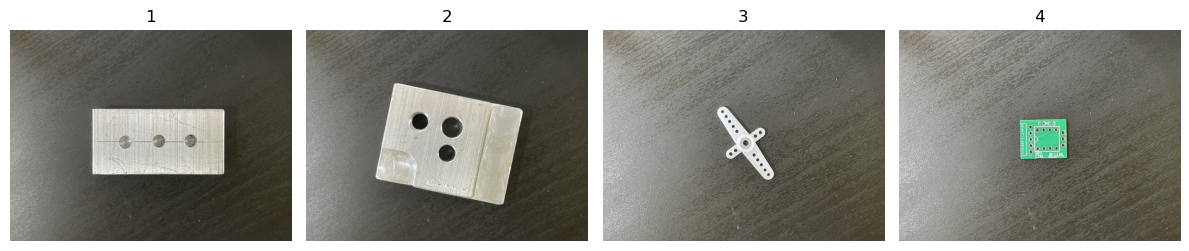

In [4]:
base_path = os.getcwd()
print("Base path:", base_path)
files = []

# parts_path = os.path.join(base_path, "data", "physical parts")
# files.append( os.path.join(parts_path, "Basic II base part.jpg") )
# files.append( os.path.join(parts_path, "mill part 2.jpeg") )
# files.append( os.path.join(parts_path, "servo mount 1.jpeg") )
# files.append( os.path.join(parts_path, "small PCB 2.jpeg") )

# parts_path = os.path.join(base_path, "data", "physical parts", "52mm 7in")
# img11 = os.path.join(parts_path, "Basic II base part 2.jpeg")
# img22 = os.path.join(parts_path, "mill part 2.jpeg")
# img33 = os.path.join(parts_path, "servo mount 1.jpeg")
# img44 = os.path.join(parts_path, "small PCB 2.jpeg")


parts_path = os.path.join(base_path, "data", "physical parts", "52mm 7in blk")
# files.append( os.path.join(parts_path, "Basic II base part 1 thk0.50.jpeg") )
files.append( os.path.join(parts_path, "Basic II base part 2 thk0.50.jpeg") )
files.append( os.path.join(parts_path, "mill part 1 thk0.50.jpeg") )
files.append( os.path.join(parts_path, "servo mount 1 thk0.20.jpeg") )
files.append( os.path.join(parts_path, "small PCB 2 thk0.06.jpeg") )

titles = [str(i) for i in range(1, len(files)+1)]

imgs = detection.show_images_from_files(files, titles)

# 3. Pass each image through f_get_edges(); extract result & intermediate images

In [5]:
img_results = []
for img in imgs:
    # find edges on original image
    edges, interms = f_get_edges(img, return_interm=True)

    # find features & overlay them on edge map
    # we can perform measurement on the following outputs 
    lines = f_find_lines(edges)
    circles = f_find_circles(edges)
    # circles = f_find_circles(img, return_type="circles")
    img_lines = draw_lines_circles(edges, lines, [])
    img_circles = draw_lines_circles(edges, [], circles)
    # features = draw_lines_circles(edges, lines, circles)


    # doing measurement here
    if DO_MEAS:
        measured_lines = measurement.measure_line(lines, conversion_ratio=1.0)
        measured_circles = measurement.measure_circle(circles, conversion_ratio=1.0)


    # organize results
    result = [img]
    result.extend(interms)
    result.append(edges)
    result.append(img_lines)
    result.append(img_circles)
    # result.append(features)
    
    # store results of this instance
    img_results.append(result)

    # display measurement results
    if DO_MEAS:
        out = measurement.draw_measurements(img, measured_lines, measured_circles)
        plt.figure()
        plt.imshow(out)

100
33
133
167
[]
[(np.int64(2135), np.int64(1589), np.int64(101)), (np.int64(2580), np.int64(1588), np.int64(101)), (np.int64(2135), np.int64(1605), np.int64(90)), (np.int64(1654), np.int64(1602), np.int64(104)), (np.int64(2134), np.int64(1581), np.int64(92)), (np.int64(1643), np.int64(1608), np.int64(100)), (np.int64(2585), np.int64(1605), np.int64(88)), (np.int64(2593), np.int64(1574), np.int64(90)), (np.int64(2114), np.int64(1581), np.int64(89)), (np.int64(2566), np.int64(1580), np.int64(89)), (np.int64(2112), np.int64(1608), np.int64(95)), (np.int64(1621), np.int64(1644), np.int64(42)), (np.int64(1831), np.int64(1600), np.int64(22)), (np.int64(1938), np.int64(1604), np.int64(20)), (np.int64(1625), np.int64(2031), np.int64(21)), (np.int64(2602), np.int64(1536), np.int64(26)), (np.int64(2087), np.int64(1547), np.int64(24)), (np.int64(2248), np.int64(1591), np.int64(18)), (np.int64(1945), np.int64(1135), np.int64(19)), (np.int64(2503), np.int64(1565), np.int64(20)), (np.int64(2145), 

# 4. Plot all images in organized format
images (or different objects) listed along rows;
intermediate results of each object listed along columns

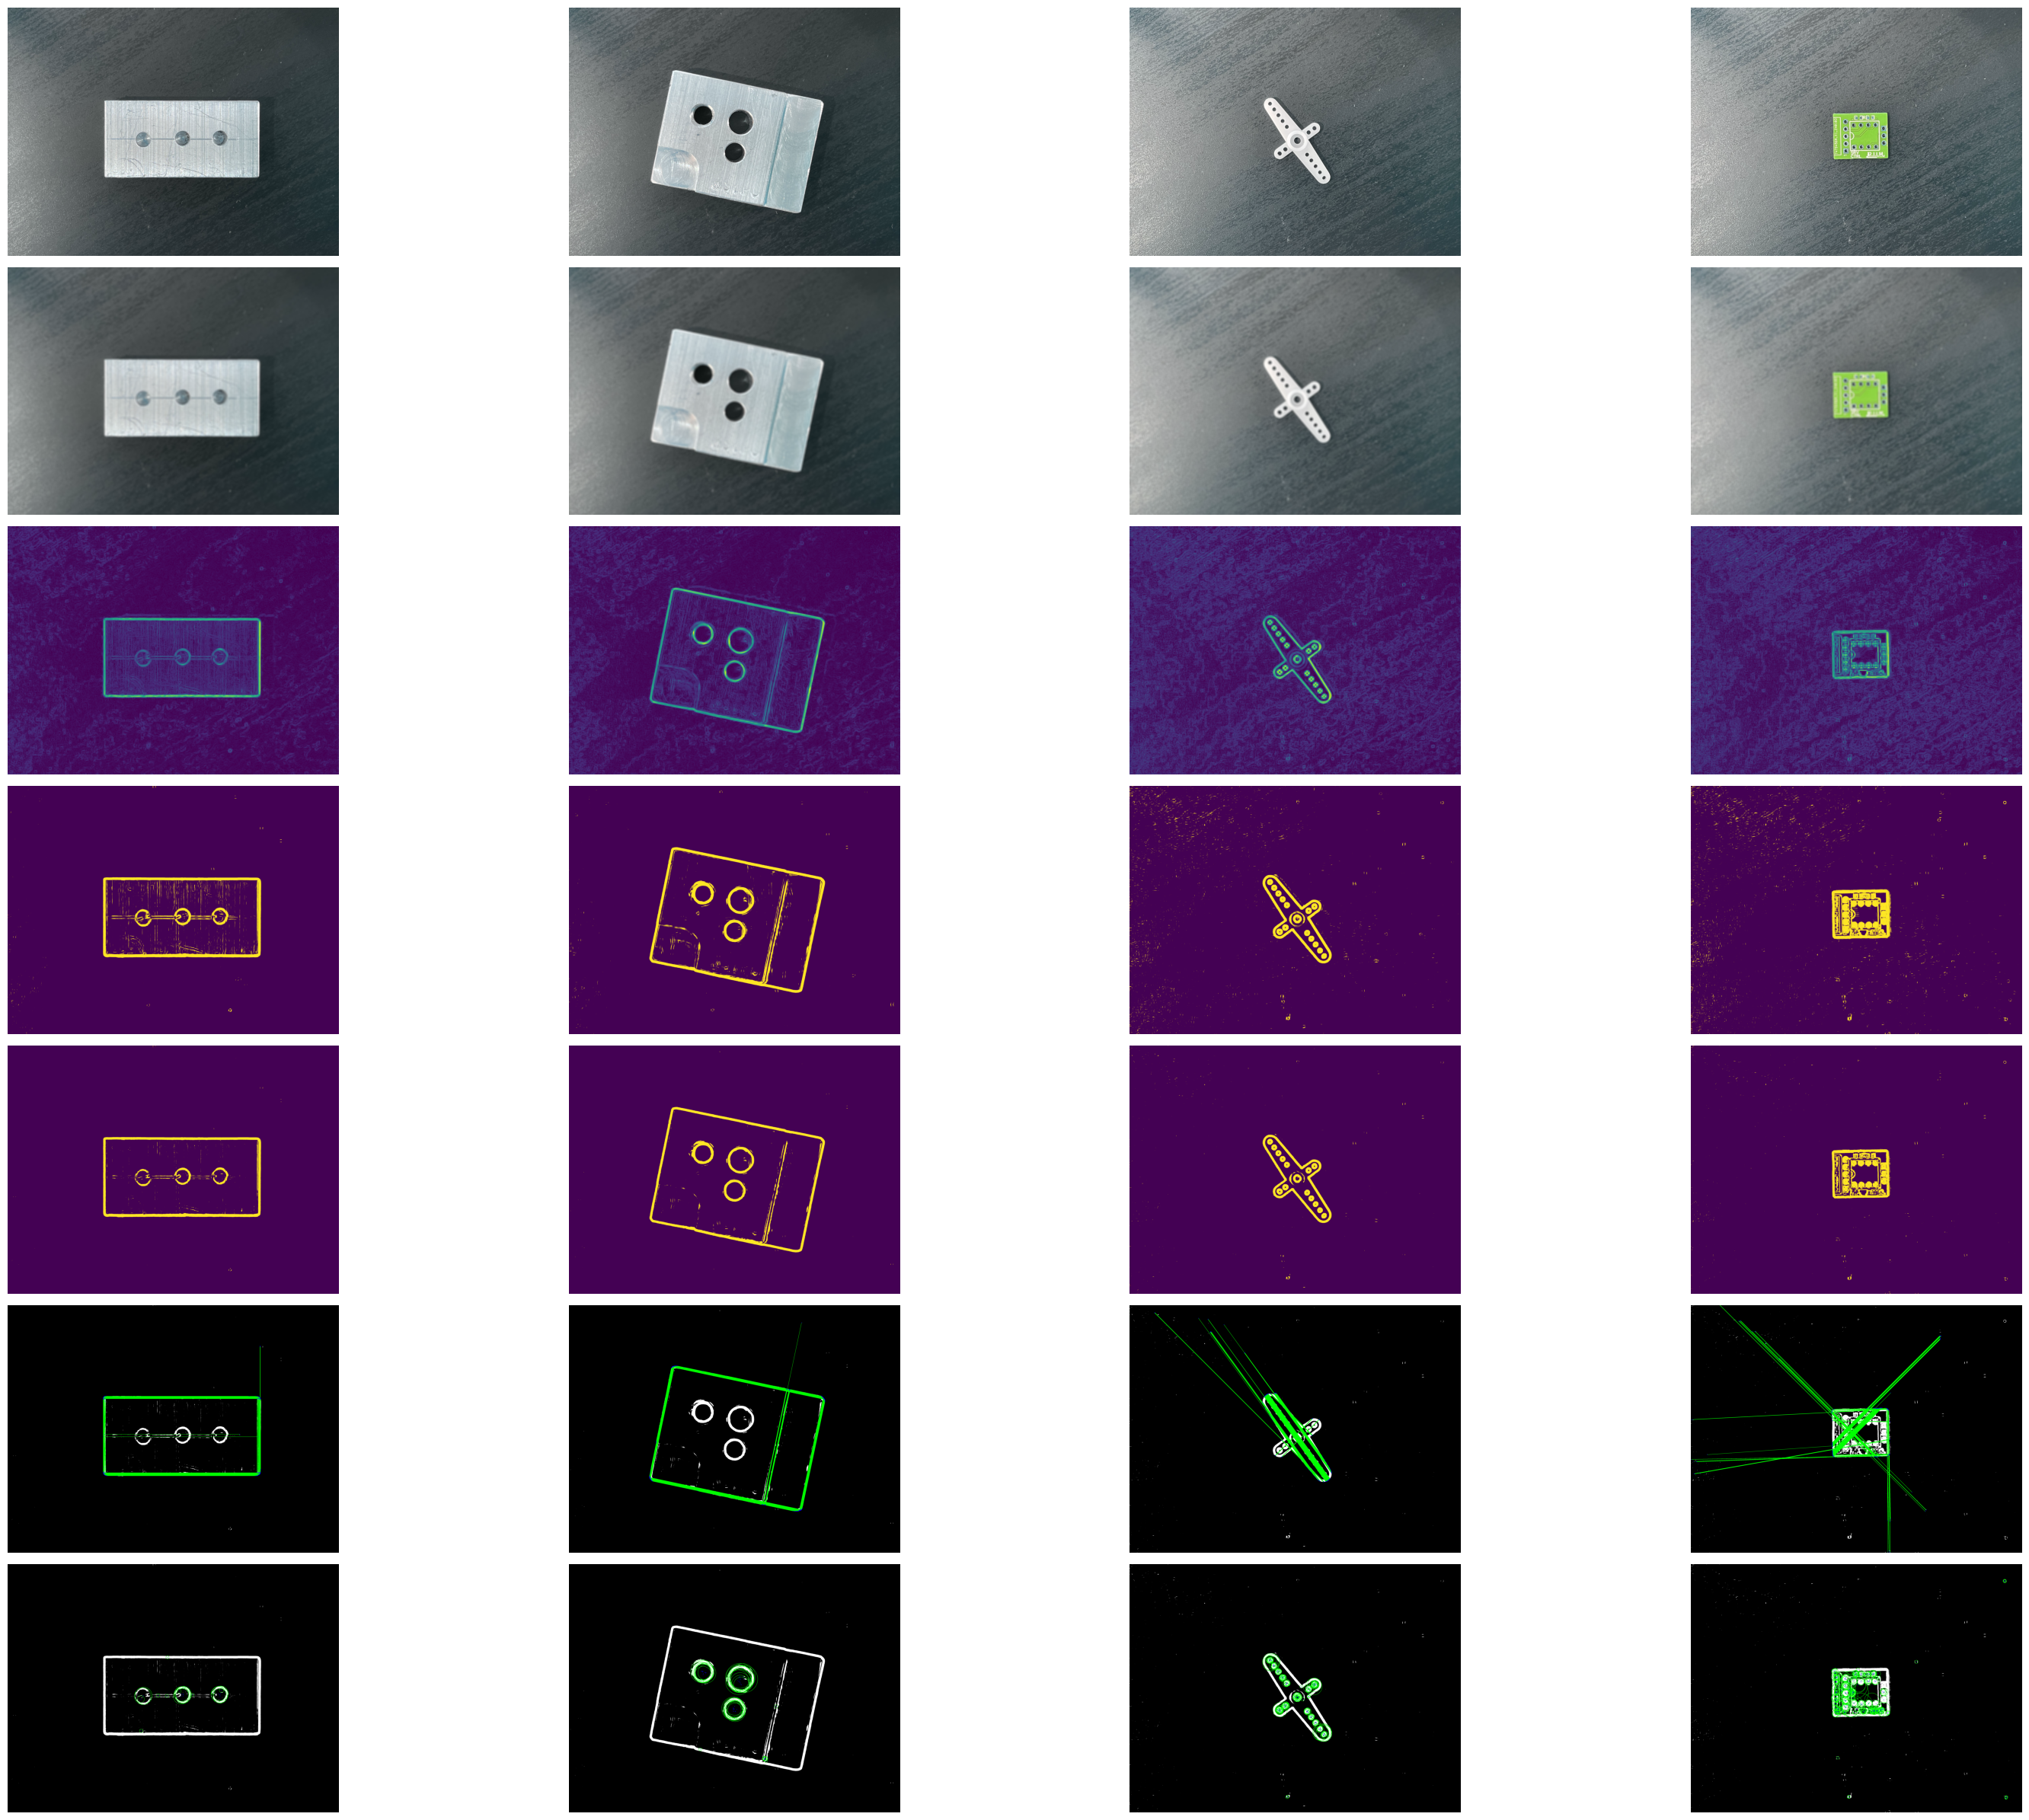

In [6]:
figsize = (32,24)    # physical part images taken from iphone should be of shape 4:3
cols = len(img_results)     # plot objects along cols
rows = len(img_results[0])  # plot steps along rows

plt.figure(figsize=figsize)
i = 1
for r in range(rows):
    for obj in img_results:
        plt.subplot(rows, cols, i)
        rst = obj[r]
        plt.imshow(rst)
        plt.axis('off')
        i += 1
plt.tight_layout()
plt.show()


# Filtration: 12/2/2025

Define filtration methods

In [7]:
from sklearn.cluster import DBSCAN

def filter_lines(lines, eps_pos=10.0, eps_len=20.0, eps_angle=0.1, min_samples=2):
    if not lines:
        return []

    cpfs = []
    for (x1, y1, x2, y2) in lines:
        x0 = (x1 + x2) / 2.0
        y0 = (y1 + y2) / 2.0
        L  = math.hypot(x2 - x1, y2 - y1)
        t  = math.atan2(y2 - y1, x2 - x1)
        if t < 0:
            t += math.pi
        cpfs.append((x0, y0, L, t))

    cpfs = np.array(cpfs, dtype=float)

    # Scale features for DBSCAN
    X = np.empty_like(cpfs)
    X[:, 0] = cpfs[:, 0] / eps_pos
    X[:, 1] = cpfs[:, 1] / eps_pos
    X[:, 2] = cpfs[:, 2] / eps_len
    X[:, 3] = cpfs[:, 3] / eps_angle

    db = DBSCAN(eps=3.0, min_samples=min_samples)
    labels = db.fit_predict(X)

    filtered = []
    unique_labels = set(labels)
    for lbl in unique_labels:
        if lbl == -1:
            continue

        cluster_cpfs = cpfs[labels == lbl]
        if cluster_cpfs.size == 0:
            continue

        x0 = np.median(cluster_cpfs[:, 0])
        y0 = np.median(cluster_cpfs[:, 1])
        L  = np.max(cluster_cpfs[:, 2])
        t  = np.median(cluster_cpfs[:, 3])

        # Convert back to (x1, y1, x2, y2)
        dx = (L / 2.0) * math.cos(t)
        dy = (L / 2.0) * math.sin(t)

        x1 = int(round(x0 - dx))
        y1 = int(round(y0 - dy))
        x2 = int(round(x0 + dx))
        y2 = int(round(y0 + dy))

        filtered.append((x1, y1, x2, y2))

    return filtered


In [ ]:
# PROBLEM TO ADDRESS: Get rid of small circles - They get high scores when they exist inside the gradient entirely

def filter_circles(edges, circles, height, width,
                   radial_tolerance=1, # Assumed thickness tolerance of an edge 
                   grad_mag_thresh=6.0, # Magnitude threshold for gradient difference
                   angle_cos_thresh=0.7, # Threshold from orthogonal to test 
                   min_strength=0.2, # Minimum required strength to allow a cluster (0-1)
                   num_samples=180): # Num point samples drawn along the cricle

    canvas = np.zeros((height, width), dtype=np.uint8)

    if not circles:
        return [], canvas

    # Edge Gradients
    gx = cv2.Sobel(edges, cv2.CV_32F, 1, 0, ksize=3)
    gy = cv2.Sobel(edges, cv2.CV_32F, 0, 1, ksize=3)

    circles = [(int(x), int(y), int(r)) for (x, y, r) in circles if r > 0]
    n = len(circles)
    if n == 0:
        return [], canvas

    # Group circles by containment w/ union find (borrowed implementation)

    parent = list(range(n))

    def find(i):
        while parent[i] != i:
            parent[i] = parent[parent[i]]
            i = parent[i]
        return i

    def union(i, j):
        ri, rj = find(i), find(j)
        if ri != rj:
            parent[rj] = ri

    def contains(ci, cj):
        xi, yi, ri = ci
        xj, yj, rj = cj
        dx = xj - xi
        dy = yj - yi
        d = math.hypot(dx, dy)
        return d + rj <= ri

    for i in range(n):
        for j in range(i + 1, n):
            ci = circles[i]
            cj = circles[j]
            if contains(ci, cj) or contains(cj, ci):
                union(i, j)

    groups = {}
    for i in range(n):
        root = find(i)
        groups.setdefault(root, []).append(i)

    # Strength scoring using edge gradients
    def circle_strength(circle):
        x, y, r = circle
        if r <= 0:
            return 0.0

        thetas = np.linspace(0, 2 * np.pi, num_samples, endpoint=False) # Sampling points
        good = 0 # Num points that show gradient along drawn circle that is orthogonal to diameter
        total = 0

        h, w = edges.shape[:2]

        for theta in thetas:
            ct = math.cos(theta)
            st = math.sin(theta)

            for dr in range(-radial_tolerance, radial_tolerance + 1):
                rr = r + dr # Adding tolerance to assume some thickness in edge map / gradient
                if rr <= 0:
                    continue
                # Get point x and point y given x,y radius and angle of approach 
                px = int(round(x + rr * ct)) 
                py = int(round(y + rr * st))

                if px < 0 or px >= w or py < 0 or py >= h:
                    continue

                gx_val = float(gx[py, px])
                gy_val = float(gy[py, px])
                mag = math.hypot(gx_val, gy_val)

                total += 1
                if mag < grad_mag_thresh:
                    continue

                # Normalize and get sobel vector (with some additional numbers to prevent divide by zero)
                ux, uy = gx_val / (mag + 1e-6), gy_val / (mag + 1e-6)

                # Get angle of vector w/ relation to circle with dot product
                cos_angle = abs(ux * ct + uy * st)

                if cos_angle >= angle_cos_thresh:
                    good += 1

        if total == 0:
            return 0.0
        return good / total

    kept_circles = []

    for root, idxs in groups.items():
        # Evaluate strength for each circle in this group
        best_circle = None
        best_score = -1.0

        for idx in idxs:
            c = circles[idx]
            score = circle_strength(c)
            if score > best_score:
                best_score = score
                best_circle = c

        # Keep strongest circle if it meets threshold
        if best_circle is not None and best_score >= min_strength:
            kept_circles.append(best_circle)

    # Draw kept circles on canvas for debugging / visualization
    for x, y, r in kept_circles:
        cv2.circle(canvas, (x, y), r, 255, thickness=1)

    return kept_circles, canvas


Redo pipeline outlined above + filtration

In [20]:
img_results_filtered = []
i = 0

CROP = False
for img in imgs:
    if(CROP):
        img = pp.crop_largest_structure(img)[0]

    i += 1
    # find edges on original image
    edges, interms = f_get_edges(img, return_interm=True)

    # find features & overlay them on edge map
    # we can perform measurement on the following outputs 
    lines = f_find_lines(edges)
    circles = f_find_circles(edges)

    # FILTRATION 
    lines = filter_lines(lines)
    circles, fake_canvas = filter_circles(edges, circles, len(img), len(img[0]))
    print(f"Image {i} number of filtered lines: {len(lines)}")
    print(f"Image {i} number of filtered circles: {len(circles)}")


    img_lines = draw_lines_circles(edges, lines, [], 5)
    img_circles = draw_lines_circles(edges, [], circles, 5)
    # features = draw_lines_circles(edges, lines, circles)


    if DO_MEAS:
        measured_lines = measurement.measure_line(lines, conversion_ratio=1.0)
        measured_circles = measurement.measure_circle(circles, conversion_ratio=1.0)


    result = [img]
    result.extend(interms)
    result.append(edges)
    result.append(fake_canvas)
    result.append(img_lines)
    result.append(img_circles)
    # result.append(features)
    
    # store results of this instance
    img_results_filtered.append(result)

    # display measurement results
    if DO_MEAS:
        out = measurement.draw_measurements(img, measured_lines, measured_circles)
        plt.figure()
        plt.imshow(out)

100
33
133
167
Image 1 number of filtered lines: 5
Image 1 number of filtered circles: 4
[]
[(2134, 1581, 92), (2585, 1605, 88), (1831, 1600, 22), (2145, 1502, 16)]
100
33
133
167
Image 2 number of filtered lines: 7
Image 2 number of filtered circles: 2
[]
[(1627, 1312, 98), (2205, 1405, 20)]
100
33
133
167
Image 3 number of filtered lines: 13
Image 3 number of filtered circles: 14
[]
[(2319, 2006, 35), (1708, 1170, 36), (2247, 1467, 38), (1895, 1724, 39), (1915, 1449, 37), (1811, 1307, 37), (1860, 1381, 37), (1863, 1379, 37), (2212, 1860, 36), (2263, 1931, 36), (2162, 1789, 37), (2041, 1619, 24), (1924, 2831, 17), (2179, 1608, 19)]
100
33
133
167
Image 4 number of filtered lines: 16
Image 4 number of filtered circles: 31
[]
[(1869, 1798, 18), (2258, 1787, 19), (1886, 1657, 45), (2213, 1335, 39), (2242, 1432, 39), (2076, 1330, 34), (2240, 1424, 39), (2345, 1563, 40), (2233, 1327, 23), (2252, 1421, 48), (2347, 1649, 45), (1771, 1381, 29), (2253, 1702, 47), (2200, 1790, 40), (2157, 1331,

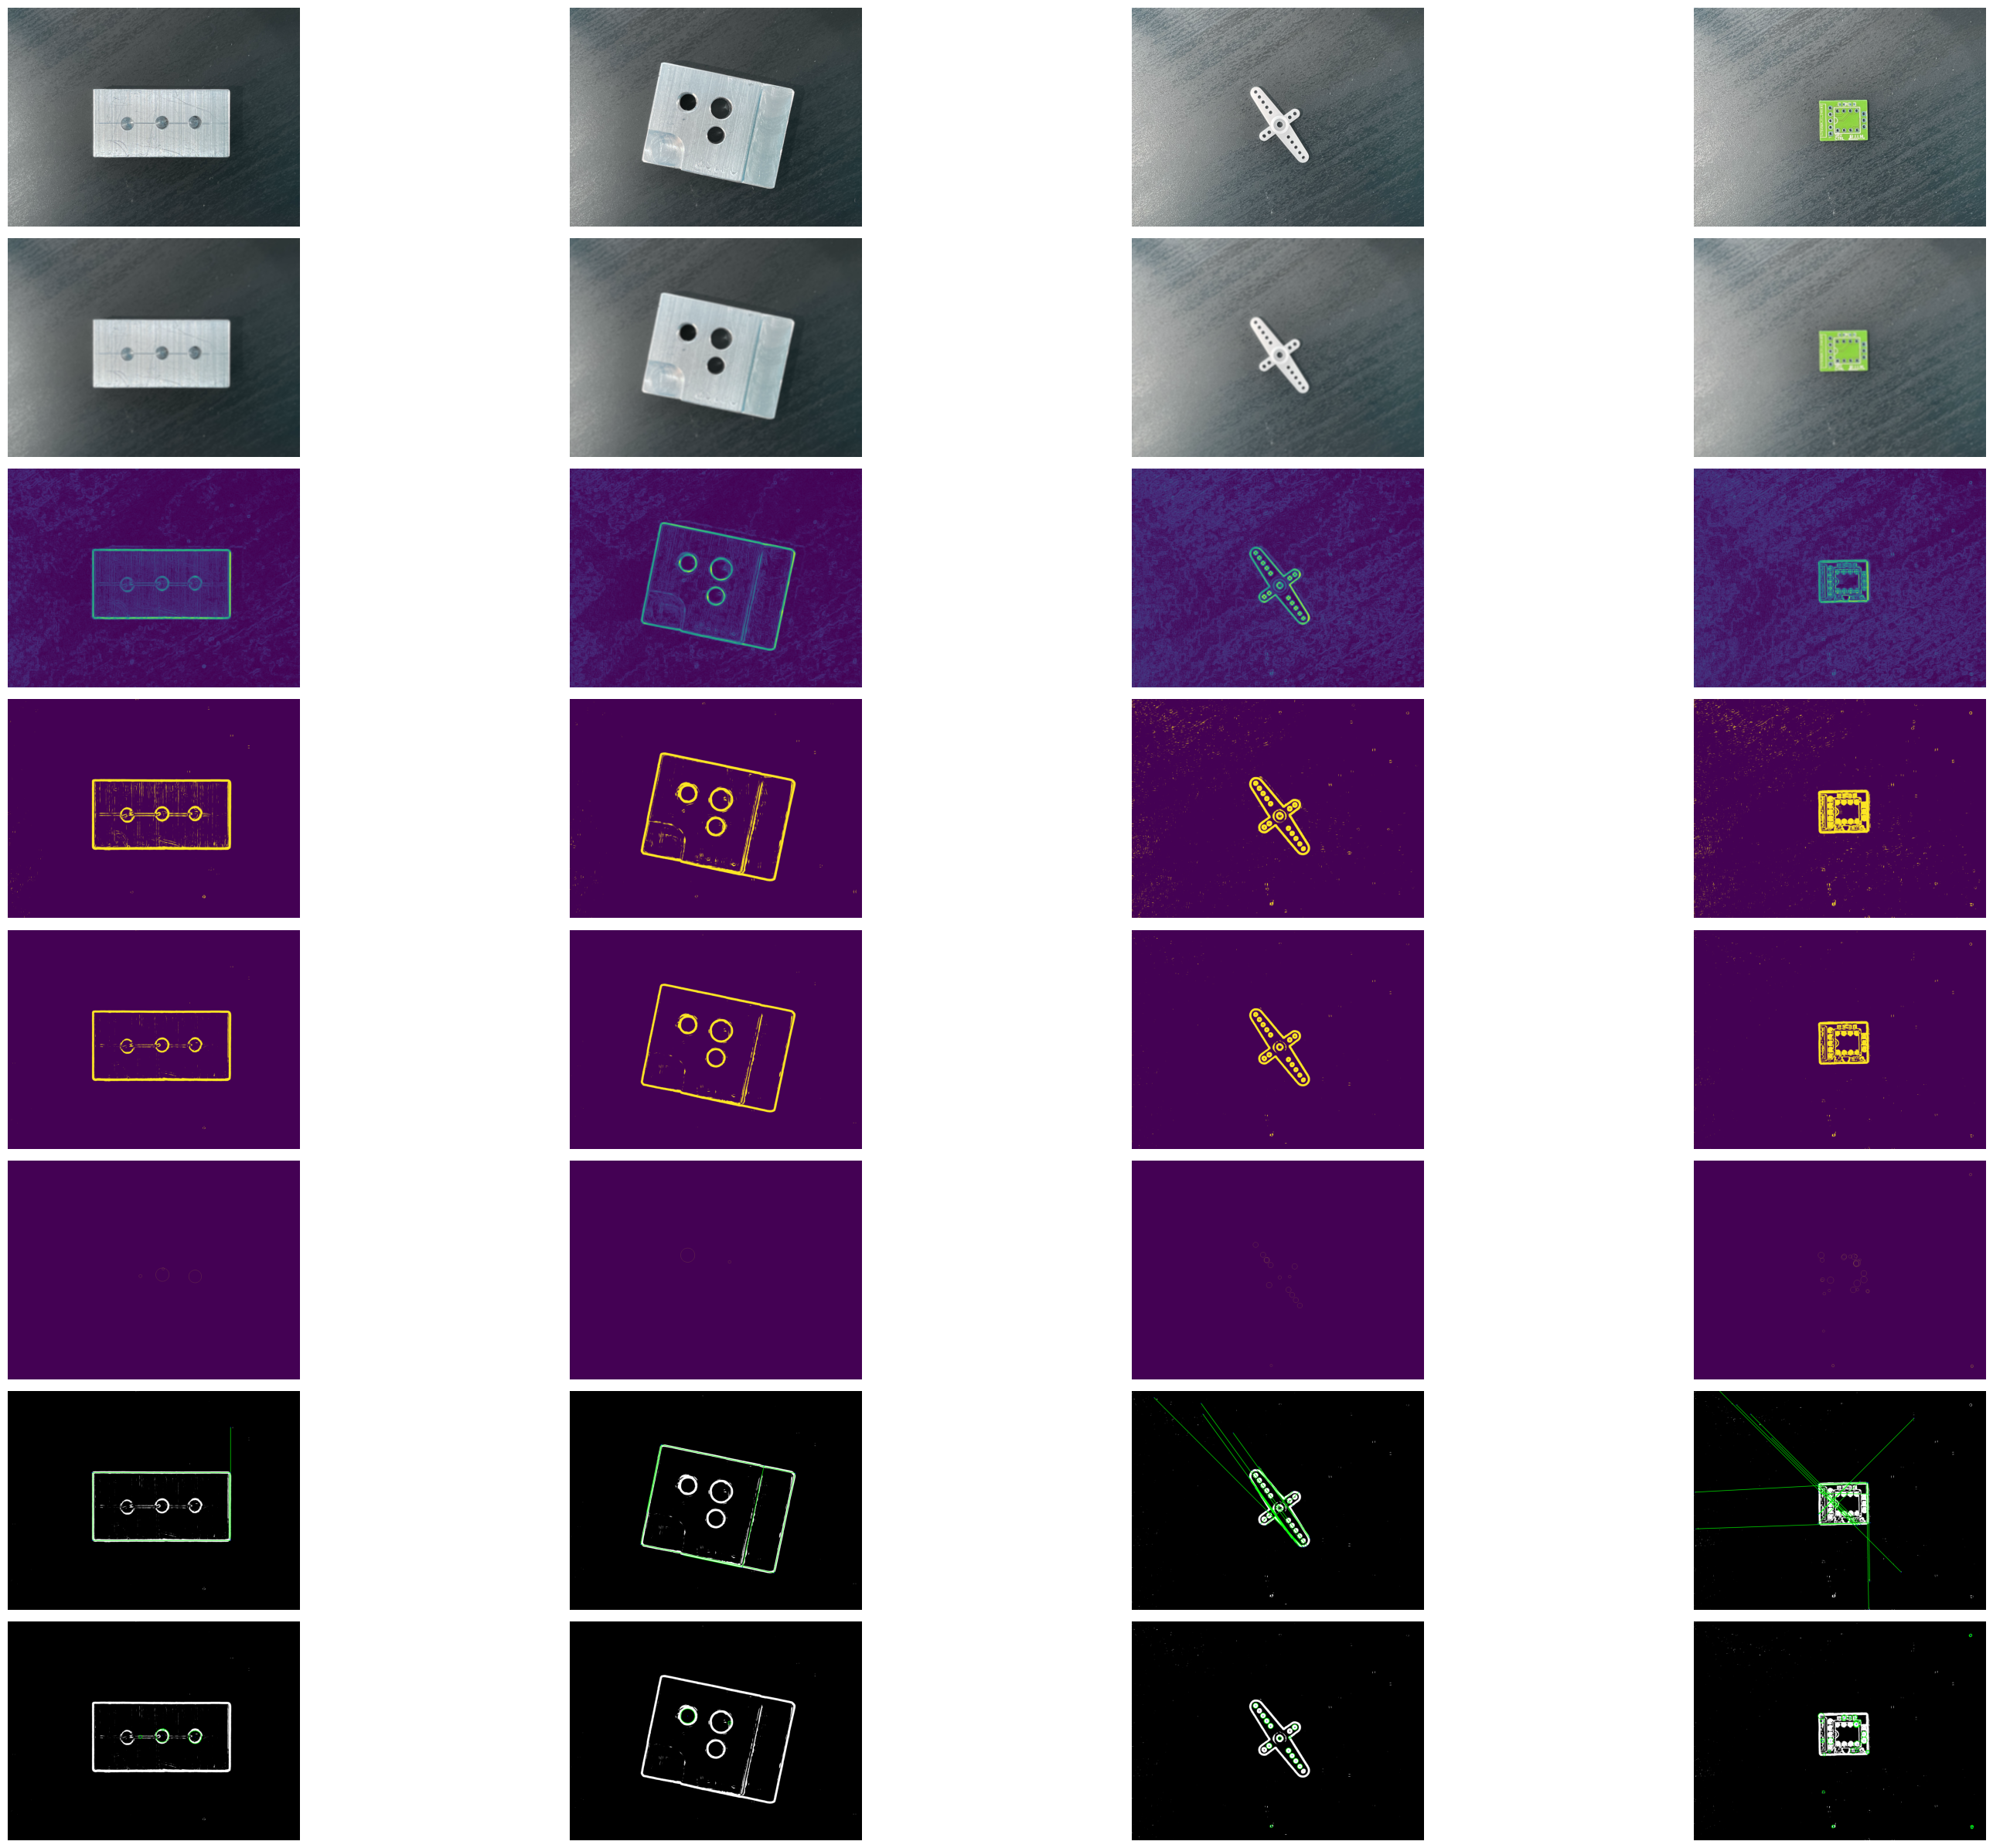

In [21]:
figsize = (32,24)    # physical part images taken from iphone should be of shape 4:3
cols = len(img_results_filtered)     # plot objects along cols
rows = len(img_results_filtered[0])  # plot steps along rows

plt.figure(figsize=figsize)
i = 1
for r in range(rows):
    for obj in img_results_filtered:
        plt.subplot(rows, cols, i)
        rst = obj[r]
        plt.imshow(rst)
        plt.axis('off')
        i += 1
plt.tight_layout()
plt.show()


# Idea 2: Change circle detector to median the midpoints of clusters

Sub point: Get more accurate crop detector (or manually crop for now) to ensure noisy circles can be filtered out by minimum radius checks